In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

customers=pd.read_csv("Customers.csv")
products=pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Category': lambda x: x.mode()[0],  # Most frequent category
    'Region': 'first'}).reset_index()

# Encode categorical data (Region, Category)
customer_features = pd.get_dummies(customer_features, columns=['Region', 'Category'], drop_first=True)


# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features.drop(columns=['CustomerID']))

# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features.drop(columns=['CustomerID', 'Cluster']), customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.5164204673282325


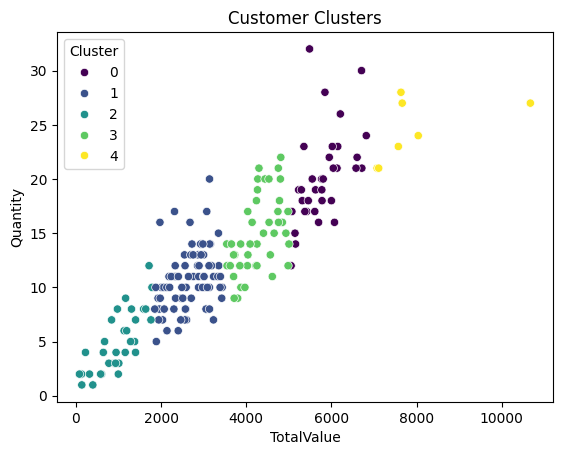

In [5]:
import seaborn as sns

# Visualize clusters
sns.scatterplot(
    x=customer_features['TotalValue'],
    y=customer_features['Quantity'],
    hue=customer_features['Cluster'],
    palette='viridis'
)
plt.title('Customer Clusters')
plt.show()